In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git
!pip install seqeval

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
LEN = 60 #max length of a query we will consider
BATCH_SIZE = 512  # Number of examples used in each iteration
EPOCHS = 3  # Number of passes through entire dataset
MAX_LEN = LEN  # Max length of review (in words)
EMBEDDING = 40  # Dimension of word embedding vecto

Using TensorFlow backend.


In [ ]:
import pandas as pd
import numpy as np
dftrain1 = pd.read_csv(r"QuerySet_Tagged_TrainData.tsv", encoding="UTF-8",sep='\t')#raw data in three columns query number, query and tags
#dftrain = pd.read_csv(r"FinalFrenchdataset10kqueries.txt", encoding="UTF-8",sep='\t')
dattrain1 = dftrain1.values.tolist()#list of queries and tags; dat[i][0]=query, dat[i][1]= entity
l = len(dattrain1)
print(len(dattrain1))

6057


In [ ]:
import pandas as pd
import numpy as np
#dftrain = pd.read_csv(r"QuerySet_Tagged_TrainData.tsv", encoding="UTF-8",sep='\t')#raw data in three columns query number, query and tags
dftrain = pd.read_csv(r"FinalFrenchdataset12kqueries.txt", encoding="UTF-8",sep='\t')
dattrain = dftrain.values.tolist()#list of queries and tags; dat[i][0]=query, dat[i][1]= entity
l = len(dattrain)
print(len(dattrain))

11080


In [ ]:
dattrain = dattrain1+dattrain2
print(len(dattrain))

['excel  formule', 'B-entity  B-entity']

In [ ]:
#only for french
i=0
while i<len(dattrain):
  dattrain[i][0]=str(dattrain[i][0]).strip()
  dattrain[i][1]=str(dattrain[i][1]).strip()
  i+=1

In [ ]:
dattrain[0]

['temporaires  internet  explorer', 'O  B-entity  B-action']

In [ ]:
i = 0
datstrain = [[] for i in range(l)]
while i<l:
  datstrain[i] =  [x for x in dattrain[i] if str(x) != 'nan'] #contains list of queries amd tags dats[i][0]= query, dats[i][1]= list of entities
  i+=1
print(len(datstrain))

11080


In [ ]:
datstrainf = list(filter(None, datstrain))

In [ ]:
len(datstrainf)

11044

In [ ]:
i=0
count=0
data1train = [[] for i in range(len(datstrain))]# contains only those queries from dats whose length that is the number of words is <= LEN
while i<len(datstrainf):
  print(i)
  if len(datstrainf[i][0])>LEN:
    i+=1
    continue
  if len(datstrainf[i])<2:
    i+=1
    continue
  data1train[count].append(datstrainf[i][0])
  data1train[count].append(datstrainf[i][1])
  count+=1
  i+=1
print(len(data1train))
print(count)

In [ ]:
datatrain = list(filter(None, data1train))# contains no empty rows as in data1
print(len(datatrain))

10911


In [ ]:
i=0
m = 0 # maximam length of a query in data
while i<len(datatrain):
  #print(i)
  tmp1=[]
  tmp2=[]
  tmp1 = datatrain[i][0].split(" ")
  tmp2 = datatrain[i][1].split(" ")
  tl1 = len(tmp1)
  tl2 = len(tmp2)
  #if tl1 == tl2:
  if tl1>m:
      m = tl1
  i+=1
print(m)

21


In [ ]:
NumberOfTrainSentences = len(datatrain)# number of sentences used to train
l = len(datatrain)
otrain = [[] for i in range(l)] # o[i][0]= list of words in a sentence; o[i][1]= list of entites for each word
i=0
count = 0
while i<l:
    p1=[]
    p2=[]
    p1=list(datatrain[i][0].split(' '))
    p1 = [i for i in p1 if i != '']
    print(p1)
    tl1 = len(p1)
    #print(tl1)
    p2=list(datatrain[i][1].split(' '))
    p2 = [i for i in p2 if i != '']
    #print(p2)
    tl2 = len(p2)
    #print(tl2)
    if tl1!=tl2:
      i = i+1
      continue
    otrain[count].append(p1)
    otrain[count].append(p2)
    count+=1
    #print(o[i])
    i+=1

Streaming output truncated to the last 5000 lines.
['automatique', 'outlook', 'outlook', 'dans', 'cas', 'des']
['skype', 'réunion', 'outlook']
['outlook', 'sans', 'blocage']
['outlook', 'sans']
['sans']
['sans', 'outlook', 'utilisation']
['outlook']
['outlook', 'connecter', 'connecter']
['outlook', 'connecter', 'connecter', 'mon', 'outlook']
['outlook', 'connecter']
['outlook', 'connecter', 'ou']
['outlook', 'connecter']
['outlook', 'connecter', 'connecter']
['automatique', 'signature']
['abonnement', 'synchroniser']
['outlook', 'travaux']
['aphp', 'web', 'application']
['pivot', 'web', 'application']
['web', 'application', 'messagerie']
['outlook', 'web', 'application', 'peux']
['a', 'accès', 'webmail']
['outlook', 'supprimés', 'envoyés']
['outlook', 'server', 'erreur']
['outlook', 'com', 'journal', 'dans', 'connecter', 'mon']
['outlook']
['outlook']
['outlook']
['outlook']
['outlook', 'live', 'ajouter', 'une']
['outlouk', '2019', 'parametre']
['outlouk', 'boite']
['outolook', '2013',

In [ ]:
i=0
count=0
while i<len(otrain):
  if len(otrain[i])!=0:
    count+=1
  i+=1
print(count)

10648


In [ ]:
o1train = list(filter(None, otrain)) #contains only those sentences from o which have the same number of words and tags

In [ ]:
count = 0
i = 0
l = len(o1train)
finaltrain = [[] for i in range(l)] # final[i] = list of word and tag of words in ith sentence; final[i]=[[word1,tag1],[word2,tag2]...]
wordstrain=[]
tagstrain=[]
while i<l:
    if len(o1train[i])==0:
      i+=1
      continue
    #print(i)
    l1 = len(o1train[i][0])
    l2 = len(o1train[i][1])
    if l1!=l2:
      i+=1
      continue
    if l1==0 :
      i+=1
      continue
    if l2==0 :
      i+=1
      continue
    j = 0
    while j<l1:
        tmp = [o1train[i][0][j],o1train[i][1][j]]
        finaltrain[count].append(tmp)
        if o1train[i][0][j] not in wordstrain :
                wordstrain.append(o1train[i][0][j]) # list of unique words
        if o1train[i][1][j] not in tagstrain :
                tagstrain.append(o1train[i][1][j])  # list of unique tags
        j+=1
    count+=1
    i+=1
    #words.append("ENDPAD")

In [ ]:
def get_sentencetrain(num):
    return finaltrain[num]

In [ ]:
word2idx1train = {w: i+1  for i, w in enumerate(wordstrain)}
#word2idx1["UNK"] = 1 
#word2idx1["PAD"] = 0
idx2word1train = {i: w for w, i in word2idx1train.items()}
tag2idx1train = {t: i for i, t in enumerate(tagstrain)}
#tag2idx1["PAD"] = 0
idx2tag1train = {i: w for w, i in tag2idx1train.items()}
n_wordstrain = len(wordstrain)
n_tagstrain = len(tagstrain)
from keras.preprocessing.sequence import pad_sequences

In [ ]:
tag2idx1train

{'B-action': 2, 'B-entity': 1, 'I-action': 4, 'I-entity': 3, 'O': 0}

In [ ]:
#useless module
X1 = [[] for i in range(l)]
i=0
while i<l:
    l1 = len(final[i])
    j = 0
    while j<l1 :
        X1[i].append(word2idx1[final[i][j][0]])
        j+=1
    if l1<maxi :
        j=1
        while j<(maxi-l1+1) :
            X1[i].append(0)
            j+=1
    i+=1
y1 = [[] for i in range(l)]
i=0
while i<l:
    l1 = len(final[i])
    j = 0
    while j<l1 :
        y1[i].append(tag2idx1[final[i][j][1]])
        j+=1
    if l1<maxi :
        j=1
        while j<(maxi-l1+1) :
            y1[i].append(0)
            j+=1
    i+=1
array_X = np.array(X1)
array_y = np.array(y1)
from keras.utils import to_categorical
array_y = [to_categorical(i, num_classes=n_tags+1) for i in array_y]  # n_tags+1(PAD)
from sklearn.model_selection import train_test_split
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(array_X, array_y, test_size=0.1)

In [ ]:
sentencestrain = [[] for i in range(l)]
i=0
while i<l :
    l1 = len(finaltrain[i])
    j=0
    while j<l1 :
        sentencestrain[i].append(tuple(finaltrain[i][j]))
        j+=1
    i+=1

In [ ]:
#from here we prepare test data

In [ ]:
import pandas as pd
import numpy as np
#dftest = pd.read_csv(r"QuerySet_Tagged_TestData.tsv", encoding="UTF-8",sep='\t')#raw data in three columns query number, query and tags
dftest = pd.read_csv(r"FinalFrenchTestset3kqueries.txt.txt", encoding="UTF-8",sep='\t')
#dftest = pd.read_csv(r"FrenchDataset.txt", encoding="UTF-8",sep='\t')
dattest = dftest.values.tolist()#list of queries and tags; dat[i][0]=query, dat[i][1]= entity
l = len(dattest)
print(len(dattest))

2645


In [ ]:
i = 0
datstest = [[] for i in range(l)]
while i<l:
  datstest[i] =  [x for x in dattest[i] if str(x) != 'nan'] #contains list of queries amd tags dats[i][0]= query, dats[i][1]= list of entities
  i+=1
print(len(datstest))

2645


In [ ]:
i=0
count=0
datstest = list(filter(None, datstest))
print(len(datstest))
data1test = [[] for i in range(len(datstest))]# contains only those queries from dats whose length that is the number of words is <= LEN
while i<len(datstest):
  #print(i)
  if len(datstest[i][0])>LEN:
    i+=1
    continue
  if len(datstest[i])<2:
    i+=1
    continue
  data1test[count].append(datstest[i][0])
  data1test[count].append(datstest[i][1])
  count+=1
  i+=1
print(len(data1test))
print(count)

2637
2637
2601


In [ ]:
datatest = list(filter(None, data1test))# contains no empty rows as in data1
print(len(datatest))

2601


In [ ]:
i=0
mtest = 0 # maximam length of a query in data
while i<len(datatest):
  #print(i)
  tmp1=[]
  tmp2=[]
  tmp1 = datatest[i][0].split(" ")
  tmp2 = datatest[i][1].split(" ")
  tl1 = len(tmp1)
  tl2 = len(tmp2)
  #if tl1 == tl2:
  if tl1>mtest:
      mtest = tl1
  i+=1

In [ ]:
print(m)
print(mtest)

21
21


In [ ]:
NumberOfTestSentences = len(datatest)# number of sentences used to train
l = len(datatest)
otest = [[] for i in range(l)] # o[i][0]= list of words in a sentence; o[i][1]= list of entites for each word
i=0
count = 0
while i<l:
    p1=[]
    p2=[]
    p1=list(datatest[i][0].split(' '))
    p1 = [i for i in p1 if i != '']
    #print(p1)
    tl1 = len(p1)
    #print(tl1)
    p2=list(datatest[i][1].split(' '))
    p2 = [i for i in p2 if i != '']
    #print(p2)
    tl2 = len(p2)
    #print(tl2)
    if tl1!=tl2:
      i = i+1
      continue
    otest[count].append(p1)
    otest[count].append(p2)
    count+=1
    #print(o[i])
    i+=1

In [ ]:
i=0
count=0
while i<len(otest):
  if len(otest[i])!=0:
    count+=1
  i+=1
print(count)

2527


In [ ]:
o1test = list(filter(None, otest))

In [ ]:
count = 0
i = 0
l = len(o1test)
finaltest = [[] for i in range(l)] # final[i] = list of word and tag of words in ith sentence; final[i]=[[word1,tag1],[word2,tag2]...]
wordstest=[]
tagstest=[]
while i<l:
    if len(o1test[i])==0:
      i+=1
      continue
    #print(i)
    l1 = len(o1test[i][0])
    l2 = len(o1test[i][1])
    if l1!=l2:
      i+=1
      continue
    if l1==0 :
      i+=1
      continue
    if l2==0 :
      i+=1
      continue
    j = 0
    while j<l1:
        tmp = [o1test[i][0][j],o1test[i][1][j]]
        finaltest[count].append(tmp)
        if o1test[i][0][j] not in wordstest :
                wordstest.append(o1test[i][0][j]) # list of unique words
        if o1test[i][1][j] not in tagstest :
                tagstest.append(o1test[i][1][j])  # list of unique tags
        j+=1
    count+=1
    i+=1
    #words.append("ENDPAD")

In [ ]:
def get_sentence(num):
    return finaltest[num]

In [ ]:
word2idx1test = {w: i+1  for i, w in enumerate(wordstest)}
#word2idx1["UNK"] = 1 
#word2idx1["PAD"] = 0
idx2word1test = {i: w for w, i in word2idx1test.items()}
tag2idx1test = {t: i for i, t in enumerate(tagstest)}
#tag2idx1["PAD"] = 0
idx2tag1test = {i: w for w, i in tag2idx1test.items()}
n_wordstest = len(wordstest)
n_tagstest = len(tagstest)
from keras.preprocessing.sequence import pad_sequences

In [ ]:
i=0
words=[]
while i<len(wordstrain):
  print(i)
  if wordstrain[i] not in words:
    words.append(wordstrain[i])
  i+=1
i=0
while i<len(wordstest):
  print(i)
  if wordstest[i] not in words:
    words.append(wordstest[i])
  i+=1

i=0
tags=[]
while i<len(tagstrain):
  print(i)
  if tagstrain[i] not in tags:
    tags.append(tagstrain[i])
  i+=1
i=0
while i<len(tagstest):
  print(i)
  if tagstest[i] not in tags:
    tags.append(tagstest[i])
  i+=1

In [ ]:
word2idx = {w: i+1  for i, w in enumerate(words)}
word2idx["PAD"] = 0
#word2idx1["UNK"] = 1 
#word2idx1["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}
tag2idx = {t: i for i, t in enumerate(tags)}
#tag2idx1["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}
n_words = len(words)
n_tags = len(tags)

In [ ]:
tag2idx

{'B-action': 2, 'B-entity': 1, 'I-action': 4, 'I-entity': 3, 'O': 0}

In [ ]:
sentencestest = [[] for i in range(l)]
i=0
while i<l :
    l1 = len(finaltest[i])
    j=0
    while j<l1 :
        sentencestest[i].append(tuple(finaltest[i][j]))
        j+=1
    i+=1

In [ ]:
from keras.preprocessing.sequence import pad_sequences
# Convert each sentence from list of Token to list of word_index
Xtrain = [[word2idx[w[0]] for w in s] for s in sentencestrain]
# Padding each sentence to have the same lenght
Xtrain = pad_sequences(maxlen=MAX_LEN, sequences=Xtrain, padding="post", value= word2idx["PAD"])

# Convert Tag/Label to tag_index
ytrain = [[tag2idx[w[1]] for w in s] for s in sentencestrain]
# Padding each sentence to have the same lenght
ytrain = pad_sequences(maxlen=MAX_LEN, sequences=ytrain, padding="post", value=tag2idx["O"])


from keras.utils import to_categorical
# One-Hot encode
ytrain = [to_categorical(i, num_classes=n_tags+1) for i in ytrain]  # n_tags+1(PAD)

from sklearn.model_selection import train_test_split
X_tr = Xtrain
y_tr = ytrain
#X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
#X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape
X_tr.shape, np.array(y_tr).shape

((10648, 60), (10648, 60, 6))

In [ ]:
from keras.preprocessing.sequence import pad_sequences
# Convert each sentence from list of Token to list of word_index
Xtest = [[word2idx[w[0]] for w in s] for s in sentencestest]
# Padding each sentence to have the same lenght
Xtest = pad_sequences(maxlen=MAX_LEN, sequences=Xtest, padding="post", value=0)

# Convert Tag/Label to tag_index
ytest = [[tag2idx[w[1]] for w in s] for s in sentencestest]
# Padding each sentence to have the same lenght
ytest = pad_sequences(maxlen=MAX_LEN, sequences=ytest, padding="post", value=tag2idx["O"])


from keras.utils import to_categorical
# One-Hot encode
ytest = [to_categorical(i, num_classes=n_tags+1) for i in ytest]  # n_tags+1(PAD)

from sklearn.model_selection import train_test_split
X_te = Xtest
y_te = ytest
#X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1)
#X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape
X_te.shape, np.array(y_te).shape

((2527, 60), (2527, 60, 6))

In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [ ]:
def get_f1(y_true, y_pred): #taken from old keras source code
 true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
 possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
 predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
 precision = true_positives / (predicted_positives + K.epsilon())
 recall = true_positives / (possible_positives + K.epsilon())
 f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
 return f1_val

In [ ]:

# Model definition
input = Input(shape=(MAX_LEN,))
model = Embedding(input_dim=n_words+1, output_dim=EMBEDDING, # n_words + 2 (PAD & UNK)
                  input_length=MAX_LEN)(input)  # default: 20-dim embedding
model = Bidirectional(LSTM(units=50, return_sequences=True,
                           recurrent_dropout=0.1))(model)  # variational biLSTM
model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
crf = CRF(n_tags+1)  # CRF layer, n_tags+1(PAD)
out = crf(model)  # output

model = Model(input, out)
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[get_f1])
#model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 60, 40)            100920    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 60, 100)           36400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 60, 50)            5050      
_________________________________________________________________
crf_1 (CRF)                  (None, 60, 6)             354       
Total params: 142,724
Trainable params: 142,724
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '


In [ ]:
len(words)

2522

In [ ]:
history = model.fit(X_tr, np.array(y_tr), batch_size=BATCH_SIZE, epochs= EPOCHS,validation_split=0.1, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 9583 samples, validate on 1065 samples
Epoch 1/3
 - 14s - loss: 0.4255 - get_f1: 0.0000e+00 - val_loss: 0.1157 - val_get_f1: 0.9644
Epoch 2/3
 - 12s - loss: 0.0988 - get_f1: 0.0000e+00 - val_loss: 0.0977 - val_get_f1: 0.9644
Epoch 3/3
 - 12s - loss: 0.0860 - get_f1: 0.0000e+00 - val_loss: 0.0857 - val_get_f1: 0.9772


In [ ]:
hist = pd.DataFrame(history.history)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
test_pred = model.predict(X_te, verbose=1)

2527/2527 [==============================] - 2s 644us/step


In [ ]:
test_pred[0]

In [ ]:
#idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

In [ ]:
test_labels,pred_labels

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 35.9%


In [ ]:
!pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 4.8MB/s 


In [ ]:
pred_cat = model.predict(X_te)
pred = np.argmax(pred_cat, axis=-1)
y_te_true = np.argmax(y_te, -1)
from sklearn_crfsuite.metrics import flat_classification_report

# Convert the index to tag
pred_tag = [[idx2tag[i] for i in row] for row in pred]
y_te_true_tag = [[idx2tag[i] for i in row] for row in y_te_true] 
X_te_true_tag = [[idx2word[i] for i in row] for row in X_te] 
report = flat_classification_report(y_pred=pred_tag, y_true=y_te_true_tag)
print(report)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    B-action       0.00      0.00      0.00      1605
    B-entity       0.49      0.67      0.56      3466
    I-action       0.00      0.00      0.00        42
    I-entity       0.00      0.00      0.00       685
           O       0.99      1.00      0.99    145822

    accuracy                           0.97    151620
   macro avg       0.29      0.33      0.31    151620
weighted avg       0.96      0.97      0.97    151620



In [ ]:
print("F1-score: {:.1%}".format(f1_score(y_te_true_tag,pred_tag)))

F1-score: 35.9%


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = y_te_true_tag[0]
predicted = pred_tag[0]
print(confusion_matrix(actual,predicted))

[[ 0  1]
 [ 0 59]]


In [ ]:
i = 100 #look at predictions
#print(X_te[i])
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_te[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_te[i], true, p[0]):
    if w != 0:
        #print(words[w-1])
        #print(tags[pred])
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))


Word           ||True ||Pred
fichier        : B-entity O
               :       O
exploreur      : B-entity O
               :       O
               :       O


In [ ]:
i=0
wronglysplit = 0
wronglytagged = 0
rightlytagged = 0
f1 = open(r"ResultCRF+OHE.txt", "a")
f2 = open(r"ErrorsCRF+OHE.txt", "a")
k = len(X_te)
output = []
while i<k:
    flag=0
    print(i)
    res = ""
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis=-1)
    true = np.argmax(y_te[i], -1)
    if len(X_te[i])!=len(p[0]):
      wronglysplit+=1
      output.append(0)
      i+=1
      continue
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        res+=words[w-1]+" "
    res+="\t"
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        res+=tags[t]+" "
        #print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))
    res+="\t"
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        res+=tags[pred]+" "
    #print(res)
    f1 = open(r"ResultCRF+OHE.txt", "a")
    res+="\n"
    f1.write(res)
    for w, t, pred in zip(X_te[i], true, p[0]):
        if t!=pred:
            wronglytagged+=1
            flag=1
            break
    if flag ==0:
      rightlytagged+=1
      output.append(1)
    #for w, t, pred in zip(X_te[i], true, p[0]):
        #if t!=pred:
    if flag ==1:
      output.append(0)
      f2 = open(r"ErrorsCRF+OHE.txt", "a")
      f2.write(res+"\n")
            #wronglytagged+=1
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
rightlytagged,wronglytagged,wronglysplit

(297, 2230, 0)

In [ ]:
actual = []
predicted = output
i=0
while i<len(X_te):
  actual.append(1)
  i+=1

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
print(confusion_matrix(actual,predicted))
print(accuracy_score(actual,predicted))
print(precision_score(actual,predicted))
print(recall_score(actual,predicted))
print(auc(actual,predicted))
lasso = linear_model.Lasso()
print(cross_val_score(y_te_true_tag,pred_tag))

[[   0    0]
 [2230  297]]
0.11753066877720618
1.0
0.11753066877720618
0.0


TypeError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(actual, predicted)

ValueError: ignored

In [ ]:
i=0
finalActualTag =  [[] for i in range(len(X_te))]
finalPredictedTag =  [[] for i in range(len(X_te))]
query=0
f = open(r"Errors.txt", "a")
k = len(X_te)
while i<k:
    res=""
    flag=0
    truetaglist = []
    predictedtaglist =[]
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis=-1)
    true = np.argmax(y_te[i], -1)
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        taglist.append(tags[t])
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        predictedtaglist.append(tags[pred])
    finalActualTag.append(taglist)
    finalPredictedTag.append(predictedtaglist)
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        res+=words[w-1]+" "
    res+="\t"
    for w, t, pred in zip(X_te[i], true, p[0]):
      if w != 0:
        if tags[t]!=tags[pred]:
          flag=1
          #res=""
          res+=words[w-1]+" "+tags[t]+" "+tags[pred]+"\t"
    if flag==1:
        f = open(r"Errors.txt", "a")
        res=res+"\n"
        print(res)
        f.write(res)
    i+=1

In [ ]:
tensorActualLabel = tf.convert_to_tensor(finalActualTag)
tensorPredictedLabel = tf.convert_to_tensor(finalPredictedTag)
num_classes = n_tags

3421

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.python.ops.metrics_impl import _streaming_confusion_matrix

In [ ]:
def fbeta(labels, predictions, num_classes, pos_indices=None, weights=None,
          average='micro', beta=1):
    cm, op = _streaming_confusion_matrix(
        labels, predictions, num_classes, weights)
    _, _, fbeta = metrics_from_confusion_matrix(
        cm, pos_indices, average=average, beta=beta)
    _, _, op = metrics_from_confusion_matrix(
        op, pos_indices, average=average, beta=beta)
    return (fbeta, op)

In [ ]:
def safe_div(numerator, denominator):
    numerator, denominator = tf.to_float(numerator), tf.to_float(denominator)
    zeros = tf.zeros_like(numerator, dtype=numerator.dtype)
    denominator_is_zero = tf.equal(denominator, zeros)
    return tf.where(denominator_is_zero, zeros, numerator / denominator)

In [ ]:
def pr_re_fbeta(cm, pos_indices, beta=1):
    """Uses a confusion matrix to compute precision, recall and fbeta"""
    num_classes = cm.shape[0]
    neg_indices = [i for i in range(num_classes) if i not in pos_indices]
    cm_mask = np.ones([num_classes, num_classes])
    cm_mask[neg_indices, neg_indices] = 0
    diag_sum = tf.reduce_sum(tf.diag_part(cm * cm_mask))

    cm_mask = np.ones([num_classes, num_classes])
    cm_mask[:, neg_indices] = 0
    tot_pred = tf.reduce_sum(cm * cm_mask)

    cm_mask = np.ones([num_classes, num_classes])
    cm_mask[neg_indices, :] = 0
    tot_gold = tf.reduce_sum(cm * cm_mask)

    pr = safe_div(diag_sum, tot_pred)
    re = safe_div(diag_sum, tot_gold)
    fbeta = safe_div((1. + beta**2) * pr * re, beta**2 * pr + re)

    return pr, re, fbeta

In [ ]:
def metrics_from_confusion_matrix(cm, pos_indices=None, average='micro',
                                  beta=1):
  num_classes = cm.shape[0]
    if pos_indices is None:
        pos_indices = [i for i in range(num_classes)]

    if average == 'micro':
        return pr_re_fbeta(cm, pos_indices, beta)
    elif average in {'macro', 'weighted'}:
        precisions, recalls, fbetas, n_golds = [], [], [], []
        for idx in pos_indices:
            pr, re, fbeta = pr_re_fbeta(cm, [idx], beta)
            precisions.append(pr)
            recalls.append(re)
            fbetas.append(fbeta)
            cm_mask = np.zeros([num_classes, num_classes])
            cm_mask[idx, :] = 1
            n_golds.append(tf.to_float(tf.reduce_sum(cm * cm_mask)))

        if average == 'macro':
            pr = tf.reduce_mean(precisions)
            re = tf.reduce_mean(recalls)
            fbeta = tf.reduce_mean(fbetas)
            return pr, re, fbeta
        if average == 'weighted':
            n_gold = tf.reduce_sum(n_golds)
            pr_sum = sum(p * n for p, n in zip(precisions, n_golds))
            pr = safe_div(pr_sum, n_gold)
            re_sum = sum(r * n for r, n in zip(recalls, n_golds))
            re = safe_div(re_sum, n_gold)
            fbeta_sum = sum(f * n for f, n in zip(fbetas, n_golds))
            fbeta = safe_div(fbeta_sum, n_gold)
            return pr, re, fbeta

    else:
        raise NotImplementedError()

In [ ]:
test_sentence = ["Hawking", "was", "a", "Fellow", "of", "the", "Royal", "Society", ",", "a", "lifetime", "member",
                 "of", "the", "Pontifical", "Academy", "of", "Sciences", ",", "and", "a", "recipient", "of",
                 "the", "Presidential", "Medal", "of", "Freedom", ",", "the", "highest", "civilian", "award",
                 "in", "the", "United", "States", "."]

In [ ]:
x_test_sent = pad_sequences(sequences=[[word2idx.get(w, 0) for w in test_sentence]],
                            padding="post", value=0, maxlen=max_len)

In [ ]:
tags

In [ ]:
p = model.predict(np.array([x_test_sent[0]]))
p = np.argmax(p, axis=-1)
print("{:15}||{}".format("Word", "Prediction"))
print(30 * "=")
for w, pred in zip(test_sentence, p[0]):
    print("{:15}: {:5}".format(w, tags[pred]))

NameError: ignored

In [ ]:
!pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 4.0MB/s 


In [ ]:
pred_cat = model.predict(X_te)
pred = np.argmax(pred_cat, axis=-1)
y_te_true = np.argmax(y_te, -1)
from sklearn_crfsuite.metrics import flat_classification_report

# Convert the index to tag
pred_tag = [[idx2tag[i] for i in row] for row in pred]
y_te_true_tag = [[idx2tag[i] for i in row] for row in y_te_true] 
X_te_true_tag = [[idx2word[i] for i in row] for row in X_te] 
report = flat_classification_report(y_pred=pred_tag, y_true=y_te_true_tag)
print(report)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
!pip install sklearn_crfsuite

     |████████████████████████████████| 747kB 3.4MB/s 


In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report


In [ ]:
test_pred = model.predict(X_te, verbose=1)


509/509 [==============================] - 1s 1ms/step


In [ ]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)

In [ ]:
i = 7001
p = model.predict(np.array([X_te[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_te[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
#print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_te[i], true, p[0]):
    print(w+"  "+t+"  "+pred)
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))



NameError: ignored

In [ ]:
i=0
while i<len(X_te):
  p = model.predict(np.array([X_te[i]]))
  p = np.argmax(p, axis=-1)
  true = np.argmax(y_te[i], -1)
  res = ""
  res + = X_te[i]+"\t"
  for t in true:
    res + =true+" "
  for pred in 


In [ ]:
test_sentence = ["App", "store"]

In [ ]:
i=0
l2 = len(X_te)
while i<l2 :
  j=0
  #l3 = len(y_te_true)
  print("Sentence begin\n")
  while j<72:
    if X_te_true_tag[i][j]!="PAD":
      print(str(X_te_true_tag[i][j])+"  "+str(y_te_true_tag[i][j]))
    j+=1
  print("Sentence end\n")
  i+=1

Sentence begin

adblock  O
free  O


IndexError: ignored

In [ ]:
!pip install matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


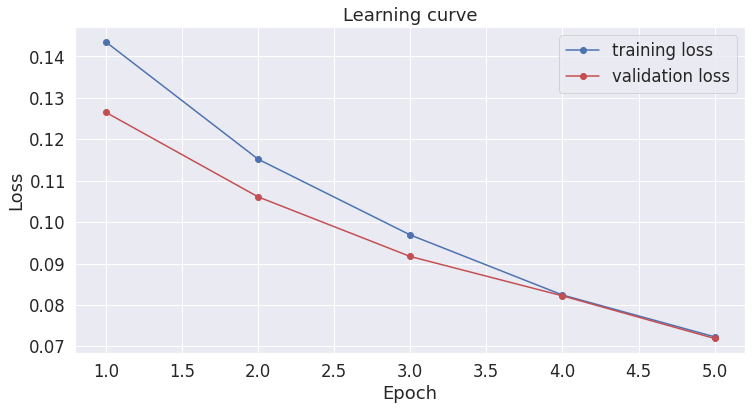

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
X1 = [0.1435,0.1152,0.0969,0.0824,0.0723]
X2 = [0.1265,0.1061,0.0917, 0.0822,0.0719]
Y = [1,2,3,4,5]
plt.plot(Y,X1,'b-o',label="training loss")
plt.plot(Y,X2,'r-o',label="validation loss")
# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
i=390
print("Word\tPredicted\tActual")
while i<400:
  j=0
  while j<MAX_LEN:
    if pred_tag[i][j] != y_te_true_tag[i][j]:
      tmpo = ""
      k=0
      while k<MAX_LEN:
        if(X_te_true_tag[i][k]!="PAD"):
          tmpo+= X_te_true_tag[i][k]+" "
        k+=1
      print(tmpo)
      k=0
      while k<MAX_LEN:
        if(y_te_true_tag[i][k]!=pred_tag[i][k]):
          print(X_te_true_tag[i][k]+"\t"+pred_tag[i][k]+"\t"+y_te_true_tag[i][k])
        k+=1
      break
    j+=1
  i+=1
      


In [ ]:
actualB = []
i=0
while i<39040:
       actualB.append(1)
       i+=1
predictedB = []
i=0
while i<36582:
  predictedB.append(1)
  i+=1
i=36582
while i<39040:
  predictedB.append(0)
  i+=1
from sklearn import metrics
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#from sklearn.metrics precision_recall_fscore_support
print(confusion_matrix(actualB,predictedB))
print(accuracy_score(actualB,predictedB))
print(precision_score(actualB,predictedB))
print(recall_score(actualB,predictedB))
#print(precision_recall_fscore_support(actualB,predictedB))
fpr, tpr, _ = roc_curve(actualB,predictedB)
roc_auc = auc(fpr, tpr)
print(roc_auc)

[[    0     0]
 [ 2458 36582]]
0.9370389344262295
1.0
0.9370389344262295


NameError: ignored